In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# import datetime as dt
# import seaborn as sns
# import geopandas as gpd

In [57]:
# Store needed FRED Codes and better labels, all data in real terms (adjusted for inflation)
codes = ['GDPPOT', 'GDPC1', 'UNRATE', 'PCEC96', 'GPDIC1', 'IMPGSC1', 'EXPGSC1', 'GCEC1']
labels = ['real_p_gdp', 'real_gdp', 'ue_rate_monthly', 'real_consum_monthly', 'real_pi', 'real_im','real_ex', 'real_gov_exp']

# Import data from FRED
fred = web.DataReader(codes,'fred', start='01-01-2000',end='01-01-2019').set_axis(labels, axis=1)

# Compute Net Exports, and change consumption and unemployment rate from monthly to quarterly
fred['real_net_ex'] = fred['real_ex'] - fred['real_im']
fred['real_consum'] = fred['real_consum_monthly'].resample('QS').mean()
fred['ue_rate'] = fred['ue_rate_monthly'].resample('QS').mean()

# Create df with monthly data (unemployment and consumption)
ue_consum_m = fred[['ue_rate_monthly','real_consum_monthly']]

# Create df with all quarterly data (all variables)
data_q = fred.drop(columns=['ue_rate_monthly','real_consum_monthly']).dropna(how='all')
data_q.head()

,real_p_gdp,real_gdp,real_pi,real_im,real_ex,real_gov_exp,real_net_ex,real_consum,ue_rate
DATE,,,,,,,,,
2000-01-01,13649.99176,13878.147,2351.223,1661.851,1280.897,2831.903,-380.954,NaN,4.033333
2000-04-01,13792.73614,14130.908,2490.501,1714.792,1319.937,2859.814,-394.855,NaN,3.933333
2000-07-01,13929.50200,14145.312,2466.375,1776.491,1351.623,2847.750,-424.868,NaN,4.000000
2000-10-01,14059.35651,14229.765,2471.534,1779.089,1338.104,2865.194,-440.985,NaN,3.900000
2001-01-01,14182.38700,14183.120,2358.969,1756.138,1321.256,2909.984,-434.882,NaN,4.233333


In [58]:
# Compute Output Gap (net difference and % difference)

data_q['net_outgap'] = data_q['real_gdp'] - data_q['real_p_gdp']
data_q['pct_outgap'] = (data_q['real_gdp'] - data_q['real_p_gdp'])/data_q['real_gdp'] * 100

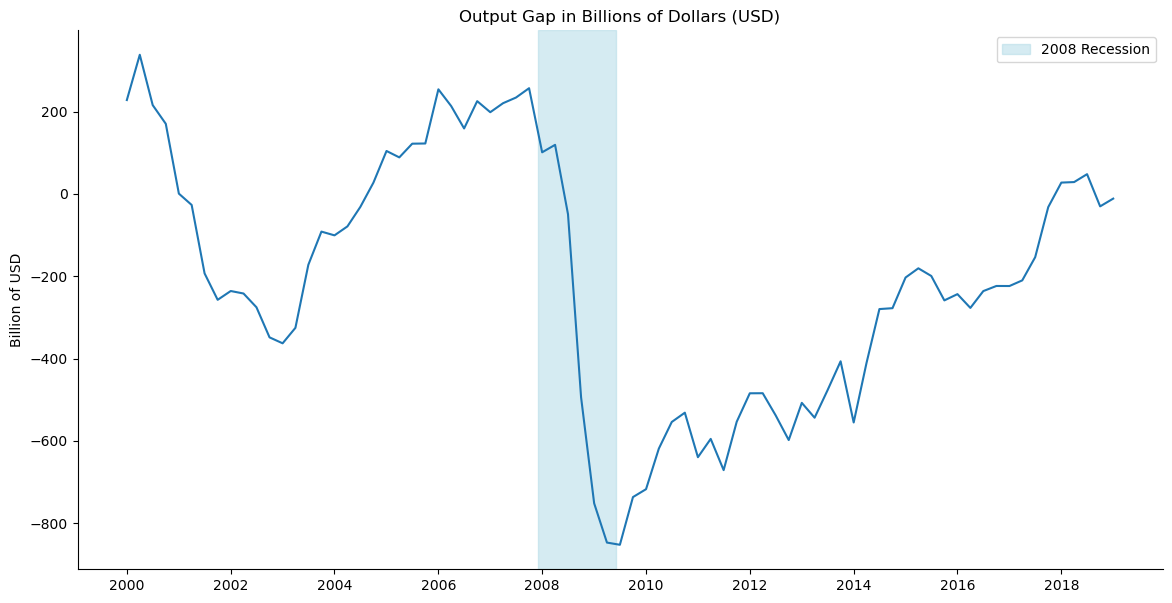

In [59]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data_q.index, data_q['net_outgap'])
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Output Gap in Billions of Dollars (USD)')
ax.set_ylabel('Billion of USD')
ax.legend()
sns.despine()
plt.show()

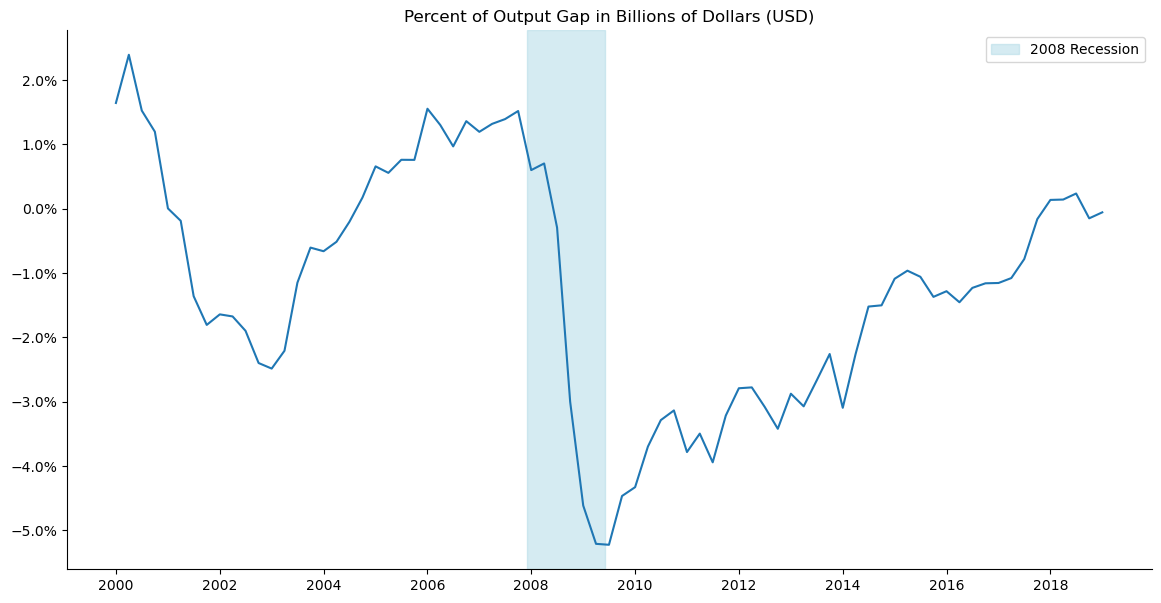

In [60]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data_q.index, data_q['pct_outgap'])
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Percent of Output Gap in Billions of Dollars (USD)')

ax.legend()
sns.despine()
plt.show()

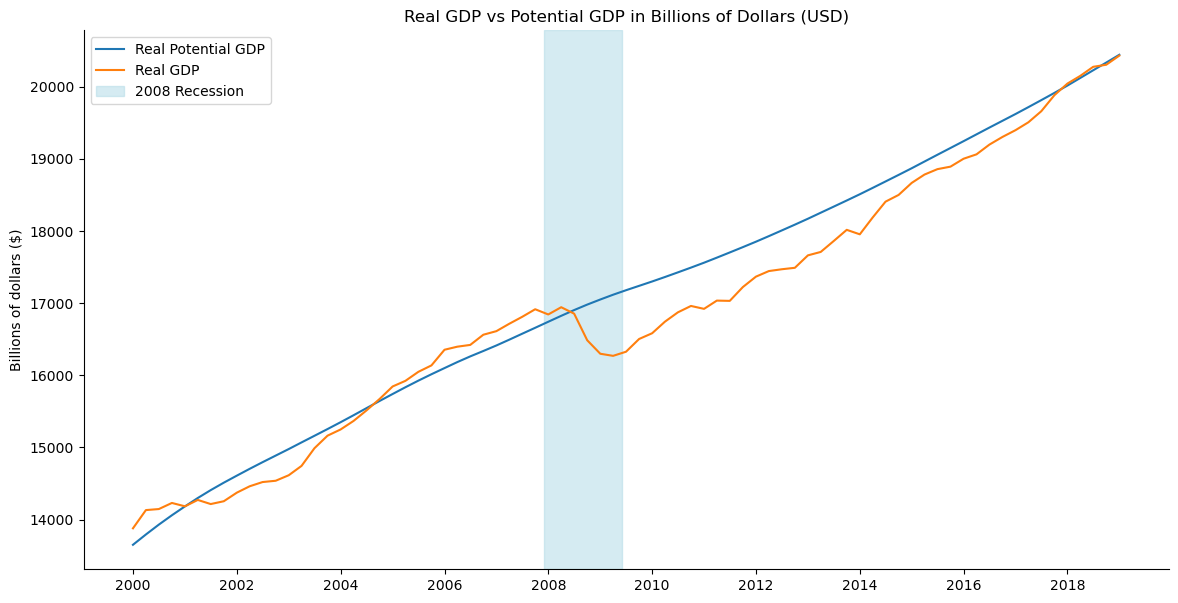

In [61]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data_q.index, data_q['real_p_gdp'], label='Real Potential GDP')
ax.plot(data_q.index, data_q['real_gdp'], label='Real GDP')
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.set_title('Real GDP vs Potential GDP in Billions of Dollars (USD)')
ax.set_ylabel('Billions of dollars ($)')
ax.legend()
sns.despine()
plt.show()

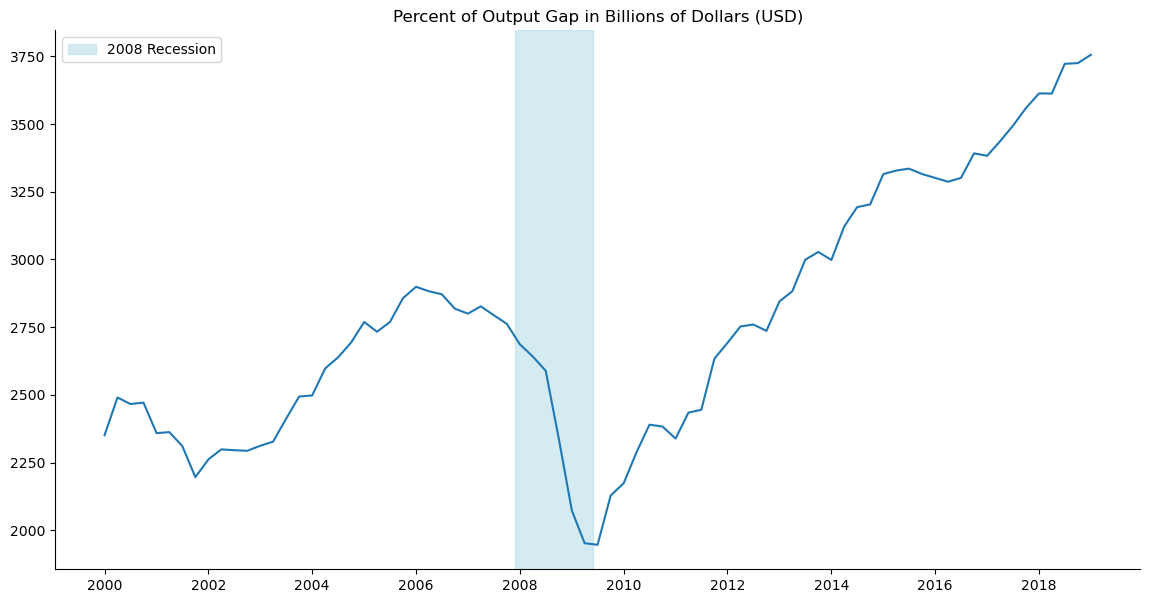

In [62]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data_q.index, data_q['real_pi'])
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.set_title('Percent of Output Gap in Billions of Dollars (USD)')

ax.legend()
sns.despine()
plt.show()

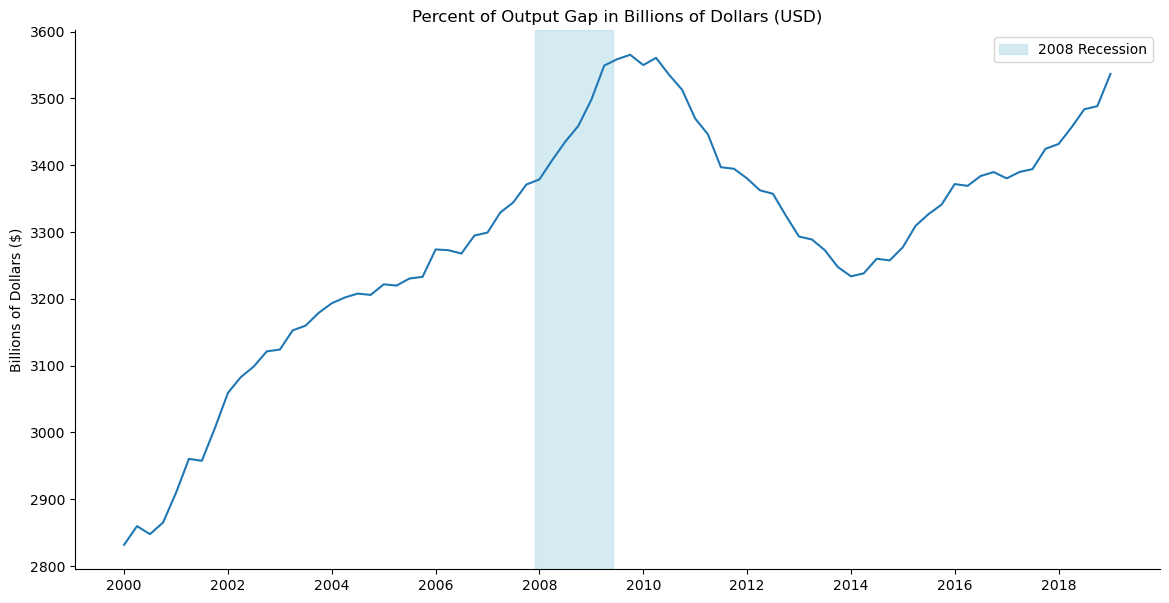

In [64]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(data_q.index, data_q['real_gov_exp'])
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.set_title('Percent of Output Gap in Billions of Dollars (USD)')
ax.set_ylabel('Billions of Dollars ($)')
ax.legend()
sns.despine()
plt.show()